In [36]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import re
from typing import List, Tuple, Dict
import numpy as np
import math
from matplotlib import rc
import os
import functools

In [37]:
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rc('text', usetex=True)

In [38]:
CONFIGS = [
    "EntanglingIPrefetcherNoPrefetcherBaselineConfig",
    "EntanglingIPrefetcherWithPrefetcherBaselineConfig",
    "EntanglingIPrefetcherTestConfig",

    "EntanglingIPrefetcherTableSize002Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize002Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize002Sets8WaysConfig",
    "EntanglingIPrefetcherTableSize004Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize004Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize004Sets8WaysConfig",
    "EntanglingIPrefetcherTableSize008Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize008Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize008Sets8WaysConfig",
    "EntanglingIPrefetcherTableSize016Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize016Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize016Sets8WaysConfig",
    "EntanglingIPrefetcherTableSize032Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize032Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize032Sets8WaysConfig",
    "EntanglingIPrefetcherTableSize064Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize064Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize064Sets8WaysConfig",
    "EntanglingIPrefetcherTableSize128Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize128Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize128Sets8WaysConfig",
    "EntanglingIPrefetcherTableSize256Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize256Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize256Sets8WaysConfig",
    "EntanglingIPrefetcherTableSize512Sets2WaysConfig",
    "EntanglingIPrefetcherTableSize512Sets4WaysConfig",
    "EntanglingIPrefetcherTableSize512Sets8WaysConfig",

    "EntanglingIPrefetcherICacheSize016Sets2WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize016Sets4WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize032Sets2WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize032Sets4WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize064Sets2WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize064Sets4WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize128Sets2WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize128Sets4WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize256Sets2WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize256Sets4WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize512Sets2WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize512Sets4WaysNoPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize016Sets2WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize016Sets4WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize032Sets2WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize032Sets4WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize064Sets2WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize064Sets4WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize128Sets2WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize128Sets4WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize256Sets2WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize256Sets4WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize512Sets2WaysWithPrefetcherConfig",
    "EntanglingIPrefetcherICacheSize512Sets4WaysWithPrefetcherConfig",

    "EntanglingIPrefetcherNoEntanglingConfig",
    "EntanglingIPrefetcherNoEntanglingSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings1UncompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings2UncompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings3UncompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings4UncompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings5UncompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings6UncompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings1UncompressedSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings2UncompressedSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings3UncompressedSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings4UncompressedSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings5UncompressedSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings6UncompressedSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings1UncompressedOnlyHeadConfig",
    "EntanglingIPrefetcherMaxEntanglings2UncompressedOnlyHeadConfig",
    "EntanglingIPrefetcherMaxEntanglings3UncompressedOnlyHeadConfig",
    "EntanglingIPrefetcherMaxEntanglings4UncompressedOnlyHeadConfig",
    "EntanglingIPrefetcherMaxEntanglings5UncompressedOnlyHeadConfig",
    "EntanglingIPrefetcherMaxEntanglings6UncompressedOnlyHeadConfig",
    "EntanglingIPrefetcherMaxEntanglings1UncompressedOnlyHeadSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings2UncompressedOnlyHeadSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings3UncompressedOnlyHeadSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings4UncompressedOnlyHeadSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings5UncompressedOnlyHeadSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings6UncompressedOnlyHeadSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings1UncompressedOnlyHeadTwoConfig",
    "EntanglingIPrefetcherMaxEntanglings2UncompressedOnlyHeadTwoConfig",
    "EntanglingIPrefetcherMaxEntanglings3UncompressedOnlyHeadTwoConfig",
    "EntanglingIPrefetcherMaxEntanglings4UncompressedOnlyHeadTwoConfig",
    "EntanglingIPrefetcherMaxEntanglings5UncompressedOnlyHeadTwoConfig",
    "EntanglingIPrefetcherMaxEntanglings6UncompressedOnlyHeadTwoConfig",
    "EntanglingIPrefetcherMaxEntanglings1UncompressedOnlyHeadTwoSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings2UncompressedOnlyHeadTwoSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings3UncompressedOnlyHeadTwoSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings4UncompressedOnlyHeadTwoSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings5UncompressedOnlyHeadTwoSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings6UncompressedOnlyHeadTwoSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings1CompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings2CompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings3CompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings4CompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings5CompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings6CompressedConfig",
    "EntanglingIPrefetcherMaxEntanglings1CompressedSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings2CompressedSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings3CompressedSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings4CompressedSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings5CompressedSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings6CompressedSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings1CompressedOnlyHeadConfig",
    "EntanglingIPrefetcherMaxEntanglings2CompressedOnlyHeadConfig",
    "EntanglingIPrefetcherMaxEntanglings3CompressedOnlyHeadConfig",
    "EntanglingIPrefetcherMaxEntanglings4CompressedOnlyHeadConfig",
    "EntanglingIPrefetcherMaxEntanglings5CompressedOnlyHeadConfig",
    "EntanglingIPrefetcherMaxEntanglings6CompressedOnlyHeadConfig",
    "EntanglingIPrefetcherMaxEntanglings1CompressedOnlyHeadSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings2CompressedOnlyHeadSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings3CompressedOnlyHeadSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings4CompressedOnlyHeadSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings5CompressedOnlyHeadSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings6CompressedOnlyHeadSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings1CompressedOnlyHeadTwoConfig",
    "EntanglingIPrefetcherMaxEntanglings2CompressedOnlyHeadTwoConfig",
    "EntanglingIPrefetcherMaxEntanglings3CompressedOnlyHeadTwoConfig",
    "EntanglingIPrefetcherMaxEntanglings4CompressedOnlyHeadTwoConfig",
    "EntanglingIPrefetcherMaxEntanglings5CompressedOnlyHeadTwoConfig",
    "EntanglingIPrefetcherMaxEntanglings6CompressedOnlyHeadTwoConfig",
    "EntanglingIPrefetcherMaxEntanglings1CompressedOnlyHeadTwoSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings2CompressedOnlyHeadTwoSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings3CompressedOnlyHeadTwoSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings4CompressedOnlyHeadTwoSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings5CompressedOnlyHeadTwoSmallICacheConfig",
    "EntanglingIPrefetcherMaxEntanglings6CompressedOnlyHeadTwoSmallICacheConfig",
]

PREF_CONFIG = "EntanglingIPrefetcherWithPrefetcherBaselineConfig"
BASE_CONFIG = "EntanglingIPrefetcherNoPrefetcherBaselineConfig"

CONFIG_PAIRS = [
    ("EntanglingIPrefetcherNoPrefetcherBaselineConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherWithPrefetcherBaselineConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTestConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),

    ("EntanglingIPrefetcherTableSize002Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize002Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize002Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize004Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize004Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize004Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize008Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize008Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize008Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize016Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize016Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize016Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize032Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize032Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize032Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize064Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize064Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize064Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize128Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize128Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize128Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize256Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize256Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize256Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize512Sets2WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize512Sets4WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherTableSize512Sets8WaysConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),

    ("EntanglingIPrefetcherICacheSize016Sets2WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize016Sets2WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize016Sets4WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize016Sets4WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize032Sets2WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize032Sets2WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize032Sets4WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize032Sets4WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize064Sets2WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize064Sets2WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize064Sets4WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize064Sets4WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize128Sets2WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize128Sets2WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize128Sets4WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize128Sets4WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize256Sets2WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize256Sets2WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize256Sets4WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize256Sets4WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize512Sets2WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize512Sets2WaysNoPrefetcherConfig"),
    ("EntanglingIPrefetcherICacheSize512Sets4WaysWithPrefetcherConfig", "EntanglingIPrefetcherICacheSize512Sets4WaysNoPrefetcherConfig"),

    ("EntanglingIPrefetcherNoEntanglingConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherNoEntanglingSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1UncompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2UncompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3UncompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4UncompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5UncompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6UncompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1UncompressedSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2UncompressedSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3UncompressedSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4UncompressedSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5UncompressedSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6UncompressedSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1UncompressedOnlyHeadConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2UncompressedOnlyHeadConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3UncompressedOnlyHeadConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4UncompressedOnlyHeadConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5UncompressedOnlyHeadConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6UncompressedOnlyHeadConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1UncompressedOnlyHeadSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2UncompressedOnlyHeadSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3UncompressedOnlyHeadSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4UncompressedOnlyHeadSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5UncompressedOnlyHeadSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6UncompressedOnlyHeadSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1UncompressedOnlyHeadTwoConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2UncompressedOnlyHeadTwoConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3UncompressedOnlyHeadTwoConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4UncompressedOnlyHeadTwoConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5UncompressedOnlyHeadTwoConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6UncompressedOnlyHeadTwoConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1UncompressedOnlyHeadTwoSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2UncompressedOnlyHeadTwoSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3UncompressedOnlyHeadTwoSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4UncompressedOnlyHeadTwoSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5UncompressedOnlyHeadTwoSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6UncompressedOnlyHeadTwoSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1CompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2CompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3CompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4CompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5CompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6CompressedConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1CompressedSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2CompressedSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3CompressedSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4CompressedSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5CompressedSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6CompressedSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1CompressedOnlyHeadConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2CompressedOnlyHeadConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3CompressedOnlyHeadConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4CompressedOnlyHeadConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5CompressedOnlyHeadConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6CompressedOnlyHeadConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1CompressedOnlyHeadSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2CompressedOnlyHeadSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3CompressedOnlyHeadSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4CompressedOnlyHeadSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5CompressedOnlyHeadSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6CompressedOnlyHeadSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1CompressedOnlyHeadTwoConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2CompressedOnlyHeadTwoConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3CompressedOnlyHeadTwoConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4CompressedOnlyHeadTwoConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5CompressedOnlyHeadTwoConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6CompressedOnlyHeadTwoConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings1CompressedOnlyHeadTwoSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings2CompressedOnlyHeadTwoSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings3CompressedOnlyHeadTwoSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings4CompressedOnlyHeadTwoSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings5CompressedOnlyHeadTwoSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
    ("EntanglingIPrefetcherMaxEntanglings6CompressedOnlyHeadTwoSmallICacheConfig", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
]

TREND_NO_PREFETCHER_BASELINE = [
    (0,   "0", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
]

TREND_NO_PREFETCHER_M1_BASELINE = [
    (-1,   "No Pref.", "EntanglingIPrefetcherNoPrefetcherBaselineConfig"),
]

TREND_TABLE_SIZE_2_WAYS = [
    (1,   "2", "EntanglingIPrefetcherTableSize002Sets2WaysConfig"),
    (2,   "4", "EntanglingIPrefetcherTableSize004Sets2WaysConfig"),
    (3,   "8", "EntanglingIPrefetcherTableSize008Sets2WaysConfig"),
    (4,  "16", "EntanglingIPrefetcherTableSize016Sets2WaysConfig"),
    (5,  "32", "EntanglingIPrefetcherTableSize032Sets2WaysConfig"),
    (6,  "64", "EntanglingIPrefetcherTableSize064Sets2WaysConfig"),
    (7, "128", "EntanglingIPrefetcherTableSize128Sets2WaysConfig"),
    (8, "256", "EntanglingIPrefetcherTableSize256Sets2WaysConfig"),
    (9, "512", "EntanglingIPrefetcherTableSize512Sets2WaysConfig"),
]

TREND_TABLE_SIZE_4_WAYS = [
    (1,   "2", "EntanglingIPrefetcherTableSize002Sets4WaysConfig"),
    (2,   "4", "EntanglingIPrefetcherTableSize004Sets4WaysConfig"),
    (3,   "8", "EntanglingIPrefetcherTableSize008Sets4WaysConfig"),
    (4,  "16", "EntanglingIPrefetcherTableSize016Sets4WaysConfig"),
    (5,  "32", "EntanglingIPrefetcherTableSize032Sets4WaysConfig"),
    (6,  "64", "EntanglingIPrefetcherTableSize064Sets4WaysConfig"),
    (7, "128", "EntanglingIPrefetcherTableSize128Sets4WaysConfig"),
    (8, "256", "EntanglingIPrefetcherTableSize256Sets4WaysConfig"),
    (9, "512", "EntanglingIPrefetcherTableSize512Sets4WaysConfig"),
]

TREND_TABLE_SIZE_8_WAYS = [
    (1,   "2", "EntanglingIPrefetcherTableSize002Sets8WaysConfig"),
    (2,   "4", "EntanglingIPrefetcherTableSize004Sets8WaysConfig"),
    (3,   "8", "EntanglingIPrefetcherTableSize008Sets8WaysConfig"),
    (4,  "16", "EntanglingIPrefetcherTableSize016Sets8WaysConfig"),
    (5,  "32", "EntanglingIPrefetcherTableSize032Sets8WaysConfig"),
    (6,  "64", "EntanglingIPrefetcherTableSize064Sets8WaysConfig"),
    (7, "128", "EntanglingIPrefetcherTableSize128Sets8WaysConfig"),
    (8, "256", "EntanglingIPrefetcherTableSize256Sets8WaysConfig"),
    (9, "512", "EntanglingIPrefetcherTableSize512Sets8WaysConfig"),
]

TREND_CACHE_SIZE_2_WAYS_WITH_PREFETCHER = [
    (4,  "16", "EntanglingIPrefetcherICacheSize016Sets2WaysWithPrefetcherConfig"),
    (5,  "32", "EntanglingIPrefetcherICacheSize032Sets2WaysWithPrefetcherConfig"),
    (6,  "64", "EntanglingIPrefetcherICacheSize064Sets2WaysWithPrefetcherConfig"),
    (7, "128", "EntanglingIPrefetcherICacheSize128Sets2WaysWithPrefetcherConfig"),
    (8, "256", "EntanglingIPrefetcherICacheSize256Sets2WaysWithPrefetcherConfig"),
    (9, "512", "EntanglingIPrefetcherICacheSize512Sets2WaysWithPrefetcherConfig"),
]

TREND_CACHE_SIZE_2_WAYS_NO_PREFETCHER = [
    (4,  "16", "EntanglingIPrefetcherICacheSize016Sets2WaysNoPrefetcherConfig"),
    (5,  "32", "EntanglingIPrefetcherICacheSize032Sets2WaysNoPrefetcherConfig"),
    (6,  "64", "EntanglingIPrefetcherICacheSize064Sets2WaysNoPrefetcherConfig"),
    (7, "128", "EntanglingIPrefetcherICacheSize128Sets2WaysNoPrefetcherConfig"),
    (8, "256", "EntanglingIPrefetcherICacheSize256Sets2WaysNoPrefetcherConfig"),
    (9, "512", "EntanglingIPrefetcherICacheSize512Sets2WaysNoPrefetcherConfig"),
]

TREND_CACHE_SIZE_4_WAYS_WITH_PREFETCHER = [
    (4,  "16", "EntanglingIPrefetcherICacheSize016Sets4WaysWithPrefetcherConfig"),
    (5,  "32", "EntanglingIPrefetcherICacheSize032Sets4WaysWithPrefetcherConfig"),
    (6,  "64", "EntanglingIPrefetcherICacheSize064Sets4WaysWithPrefetcherConfig"),
    (7, "128", "EntanglingIPrefetcherICacheSize128Sets4WaysWithPrefetcherConfig"),
    (8, "256", "EntanglingIPrefetcherICacheSize256Sets4WaysWithPrefetcherConfig"),
    (9, "512", "EntanglingIPrefetcherICacheSize512Sets4WaysWithPrefetcherConfig"),
]

TREND_CACHE_SIZE_4_WAYS_NO_PREFETCHER = [
    (4,  "16", "EntanglingIPrefetcherICacheSize016Sets4WaysNoPrefetcherConfig"),
    (5,  "32", "EntanglingIPrefetcherICacheSize032Sets4WaysNoPrefetcherConfig"),
    (6,  "64", "EntanglingIPrefetcherICacheSize064Sets4WaysNoPrefetcherConfig"),
    (7, "128", "EntanglingIPrefetcherICacheSize128Sets4WaysNoPrefetcherConfig"),
    (8, "256", "EntanglingIPrefetcherICacheSize256Sets4WaysNoPrefetcherConfig"),
    (9, "512", "EntanglingIPrefetcherICacheSize512Sets4WaysNoPrefetcherConfig"),
]

TREND_MAX_ENTANGLINGS_UNCOMPRESSED = [
    (0, "0", "EntanglingIPrefetcherNoEntanglingConfig"),
    (1, "1", "EntanglingIPrefetcherMaxEntanglings1UncompressedConfig"),
    (2, "2", "EntanglingIPrefetcherMaxEntanglings2UncompressedConfig"),
    (3, "3", "EntanglingIPrefetcherMaxEntanglings3UncompressedConfig"),
    (4, "4", "EntanglingIPrefetcherMaxEntanglings4UncompressedConfig"),
    (5, "5", "EntanglingIPrefetcherMaxEntanglings5UncompressedConfig"),
    (6, "6", "EntanglingIPrefetcherMaxEntanglings6UncompressedConfig"),
]

TREND_MAX_ENTANGLINGS_UNCOMPRESSED_ONLY_HEAD = [
    (0, "0", "EntanglingIPrefetcherNoEntanglingConfig"),
    (1, "1", "EntanglingIPrefetcherMaxEntanglings1UncompressedOnlyHeadConfig"),
    (2, "2", "EntanglingIPrefetcherMaxEntanglings2UncompressedOnlyHeadConfig"),
    (3, "3", "EntanglingIPrefetcherMaxEntanglings3UncompressedOnlyHeadConfig"),
    (4, "4", "EntanglingIPrefetcherMaxEntanglings4UncompressedOnlyHeadConfig"),
    (5, "5", "EntanglingIPrefetcherMaxEntanglings5UncompressedOnlyHeadConfig"),
    (6, "6", "EntanglingIPrefetcherMaxEntanglings6UncompressedOnlyHeadConfig"),
]

TREND_MAX_ENTANGLINGS_COMPRESSED = [
    (0, "0", "EntanglingIPrefetcherNoEntanglingConfig"),
    (1, "1", "EntanglingIPrefetcherMaxEntanglings1CompressedConfig"),
    (2, "2", "EntanglingIPrefetcherMaxEntanglings2CompressedConfig"),
    (3, "3", "EntanglingIPrefetcherMaxEntanglings3CompressedConfig"),
    (4, "4", "EntanglingIPrefetcherMaxEntanglings4CompressedConfig"),
    (5, "5", "EntanglingIPrefetcherMaxEntanglings5CompressedConfig"),
    (6, "6", "EntanglingIPrefetcherMaxEntanglings6CompressedConfig"),
]

TREND_MAX_ENTANGLINGS_COMPRESSED_ONLY_HEAD = [
    (0, "0", "EntanglingIPrefetcherNoEntanglingConfig"),
    (1, "1", "EntanglingIPrefetcherMaxEntanglings1CompressedOnlyHeadConfig"),
    (2, "2", "EntanglingIPrefetcherMaxEntanglings2CompressedOnlyHeadConfig"),
    (3, "3", "EntanglingIPrefetcherMaxEntanglings3CompressedOnlyHeadConfig"),
    (4, "4", "EntanglingIPrefetcherMaxEntanglings4CompressedOnlyHeadConfig"),
    (5, "5", "EntanglingIPrefetcherMaxEntanglings5CompressedOnlyHeadConfig"),
    (6, "6", "EntanglingIPrefetcherMaxEntanglings6CompressedOnlyHeadConfig"),
]

OUTPUT_PATTERN = """
Cycles: (\d+)
Time: (\d+)
Instret: (\d+)
I\$ response: (\d+)
I\$ miss: (\d+)
Demand refill: (\d+)
Prefetch refill: (\d+)
Prefetch consumed: (\d+)(?:
Late prefetch suggestion: (\d+))?
Late prefetch: (\d+)
Early prefetch: (\d+)
No prefetch: (\d+)
Erroneous prefetch: (\d+)
Demand miss cycles: (\d+)
Branch (?:direction )?mispredict: (\d+)(?:
New basic block: (\d+)
Emit basic block: (\d+)
Branch target mispredict: (\d+))?
"""

BENCHMARKS = [
    "barnes",
    "ocean_cp",
    "radiosity",
    "water_spatial",
]

RUNS = [
    "Core",
    "Core2",
    "Ext",
    "Branching",
    "Final",
]

BENCHMARK_COLORS = {
    "radiosity": "red",
    "barnes": "brown",
    "water_spatial": "blue",
    "ocean_cp": "cyan",
    "arith": "black",
    "geo": "black",
}

BENCHMARK_COLORS_RGB = {
    k: mcolors.to_rgb(c) for (k, c) in BENCHMARK_COLORS.items()
}

BENCHMARK_MARKERS = {
    "radiosity": "x",
    "barnes": "s",
    "water_spatial": "d",
    "ocean_cp": "o",
    "arith": "p",
    "geo": "p",
}

BENCHMARK_NAMES = {
    "radiosity": "Radiosity",
    "barnes": "Barnes",
    "water_spatial": "Water",
    "ocean_cp": "Ocean",
    "arith": "Arith. mean",
    "geo": "Geo. mean",
}

BENCHMARK_LINESTYLES = {
    "radiosity": "-",
    "barnes": "-",
    "water_spatial": "-",
    "ocean_cp": "-",
    "arith": "-", # ":",
    "geo": "-", # ":",
}

BENCHMARK_BASELINE_LINESTYLES = {
    "radiosity": "--",
    "barnes": "--",
    "water_spatial": "--",
    "ocean_cp": "--",
    "arith": "-", # "-.",
    "geo": "-", # "-.",
}

BENCHMARK_ALPHAS = {
    "radiosity": 1,
    "barnes": 1,
    "water_spatial": 1,
    "ocean_cp": 1,
    "arith": 1,
    "geo": 1,
}

METRIC_NAMES = {
    "demand_miss_cycles": "Number of cycles spend handling demand misses",
    "frac_demand_miss_cycles": "Proportion cycles spent handling demand misses",
    "erroneous_prefetch": "Number of executed, erroneous prefetches",
    "frac_erroneous_prefetch": "Proportion of executed prefetches that were erroneous",
    "no_prefetch": "Number of cache misses without any prefetch",
    "frac_no_prefetch": "Proportion of cache misses without any prefetch",
    "early_prefetch": "Number of executed prefetches that were early",
    "frac_early_prefetch": "Proportion of executed prefetches that were early",
    "late_prefetch_sug": "Number of suggested prefetches that were late",
    "frac_late_prefetch_sug": "Proportion of suggested prefetches that were late",
    "late_prefetch": "Number of executed prefetches that were late",
    "frac_late_prefetch": "Proportion of executed prefetches that were late",
    "frac_miss": "L1I-cache miss rate",
    "cpi": "Average CPI",
    "frac_useless_prefetch": "Proportion of executed prefetches that were early, late or erroneous"
}

PERCENT_LAMBDA = {
    "speedup": lambda y: (y-1)*100,
    "cpi": lambda y: y,
}

FIG_DPI = 300
FIG_DPI_BIG = 400

In [39]:
def can_import_file(path: str) -> bool:
    try:
        with open(path, "r") as fp:
            matches = re.search(OUTPUT_PATTERN, fp.read(), re.MULTILINE)      
            return matches is not None
    except:
        return False

def import_file(path: str) -> Dict[str, int]:
    output = ""
    with open(path, "r") as fp:
        output = fp.read()
    matches = re.search(OUTPUT_PATTERN, output, re.MULTILINE)      
    assert(matches is not None)
    return {
        "cycles":             int(matches.group(1)),
        "time":               int(matches.group(2)),
        "instret":            int(matches.group(3)),
        "response":           int(matches.group(4)),
        "miss":               int(matches.group(5)),
        "demand_refill":      int(matches.group(6)),
        "prefetch_refill":    int(matches.group(7)),
        "prefetch_consumed":  int(matches.group(8)),
        "late_prefetch_sug":  int(matches.group(9) or matches.group(10)),
        "late_prefetch":      int(matches.group(10) if matches.group(9) is not None else 0),
        "early_prefetch":     int(matches.group(11)),
        "no_prefetch":        int(matches.group(12)),
        "erroneous_prefetch": int(matches.group(13)),
        "demand_miss_cycles": int(matches.group(14)),
        "branch_dir_mispredict":  int(matches.group(15)),
        "new_bb":             int(matches.group(16) or 0),
        "emit_bb":            int(matches.group(17) or 0),
        "branch_targ_mispredict":  int(matches.group(18) or 0),
    }

def add_simple_metrics(metrics: Dict[str, int]) -> Dict[str, int]:
    metrics["frac_demand_miss_cycles"] = metrics["demand_miss_cycles"] / metrics["cycles"]
    metrics["frac_miss"] = metrics["miss"] / metrics["response"]
    metrics["frac_late_prefetch_sug"] = metrics["late_prefetch_sug"] / metrics["prefetch_consumed"] if metrics["prefetch_consumed"] > 0 else 0
    metrics["frac_late_prefetch"] = metrics["late_prefetch"] / metrics["prefetch_refill"] if metrics["prefetch_refill"] > 0 else 0
    metrics["frac_early_prefetch"] = metrics["early_prefetch"] / metrics["prefetch_refill"]  if metrics["prefetch_refill"] > 0 else 0
    metrics["frac_erroneous_prefetch"] = metrics["erroneous_prefetch"] / metrics["prefetch_refill"]  if metrics["prefetch_refill"] > 0 else 0
    metrics["frac_no_prefetch"] = metrics["no_prefetch"] / metrics["miss"]
    metrics["cpi"] = metrics["cycles"] / metrics["instret"]
    metrics["useless_prefetch"] = metrics["early_prefetch"] + metrics["erroneous_prefetch"] + metrics["late_prefetch"]
    metrics["useful_prefetch"] = metrics["prefetch_refill"] - metrics["useless_prefetch"]
    metrics["accuracy"] = metrics["useful_prefetch"] / metrics["prefetch_refill"] if metrics["prefetch_refill"] > 0 else 0
    metrics["inst_per_new_bb"] = metrics["instret"] / metrics["new_bb"] if metrics["new_bb"] > 0 else 0
    metrics["inst_per_emit_bb"] = metrics["instret"] / metrics["emit_bb"] if metrics["emit_bb"] > 0 else 0
    return metrics

def add_relative_metrics(data: Dict[str, Dict[str, Dict[str, int]]]):
    for prefetcher_config, baseline_config in CONFIG_PAIRS:
        if prefetcher_config in data and baseline_config in data:
            for benchmark in BENCHMARKS:
                if benchmark in data[prefetcher_config] and benchmark in data[baseline_config]:
                    data[prefetcher_config][benchmark]["speedup"] = data[baseline_config][benchmark]["time"] / data[prefetcher_config][benchmark]["time"]
                    data[prefetcher_config][benchmark]["frac_miss_change"] = data[prefetcher_config][benchmark]["frac_miss"] / data[baseline_config][benchmark]["frac_miss"] 
                    data[prefetcher_config][benchmark]["frac_demand_miss_cycles_change"] = data[prefetcher_config][benchmark]["demand_miss_cycles"] / data[baseline_config][benchmark]["demand_miss_cycles"] 
                    data[prefetcher_config][benchmark]["misses_eliminated"] = data[baseline_config][benchmark]["miss"] - data[prefetcher_config][benchmark]["miss"]
                    data[prefetcher_config][benchmark]["demand_miss_cycles_eliminated"] = data[baseline_config][benchmark]["demand_miss_cycles"] - data[prefetcher_config][benchmark]["demand_miss_cycles"]
                    data[prefetcher_config][benchmark]["coverage"] = data[prefetcher_config][benchmark]["misses_eliminated"] / data[baseline_config][benchmark]["miss"]
                    data[prefetcher_config][benchmark]["accuracy_other"] = data[prefetcher_config][benchmark]["misses_eliminated"] / data[prefetcher_config][benchmark]["prefetch_refill"] \
                        if data[prefetcher_config][benchmark]["prefetch_refill"] > 0 else 0
                    data[prefetcher_config][benchmark]["demand_miss_cycles_coverage"] = data[prefetcher_config][benchmark]["demand_miss_cycles_eliminated"] / data[baseline_config][benchmark]["demand_miss_cycles"]
                    data[prefetcher_config][benchmark]["pred_coverage"] = (
                        data[prefetcher_config][benchmark]["misses_eliminated"] + 
                        data[prefetcher_config][benchmark]["early_prefetch"] + 
                        data[prefetcher_config][benchmark]["late_prefetch"] + 
                        data[prefetcher_config][benchmark]["late_prefetch_sug"]
                    ) / data[baseline_config][benchmark]["miss"]
    return data

def add_stats_benchmarks(data: Dict[str, Dict[str, Dict[str, int]]]):
    for config in CONFIGS:
        if config in data:
            data[config]["arith"] = {}
            data[config]["geo"] = {}
            data[config]["stdev"] = {}
            data[config]["max"] = {}
            data[config]["min"] = {}
            for k in functools.reduce(lambda x, y: x|y, (set(data[config][benchmark].keys()) for benchmark in data[config])):
                benchmark_subset = [benchmark for benchmark in data[config] if k in data[config][benchmark]]
                data[config]["arith"][k] = sum(data[config][benchmark][k] for benchmark in benchmark_subset)/len(benchmark_subset)
                data[config]["geo"][k] = math.exp(sum(math.log(data[config][benchmark][k]) for benchmark in benchmark_subset)/len(benchmark_subset)) if 0 not in (data[config][benchmark][k] for benchmark in benchmark_subset) else None
                data[config]["stdev"][k] = math.sqrt(sum((data[config][benchmark][k]-data[config]["arith"][k])**2 for benchmark in benchmark_subset)/len(benchmark_subset))
                data[config]["max"][k] = max(data[config][benchmark][k] for benchmark in benchmark_subset)
                data[config]["min"][k] = min(data[config][benchmark][k] for benchmark in benchmark_subset)
    return data

RESULTS = {
    run: add_stats_benchmarks(add_relative_metrics({
        config: {
            benchmark: add_simple_metrics(
                import_file(f"/local/scratch/ldh35/rocket-chip/evaluation/results/{run}/{config}/{benchmark}.output")
            ) for benchmark in BENCHMARKS 
            if can_import_file(f"/local/scratch/ldh35/rocket-chip/evaluation/results/{run}/{config}/{benchmark}.output")
        }
        for config in CONFIGS
    })) for run in RUNS
}

In [40]:
run = "Final"
for benchmark in BENCHMARKS:
    print(f"{benchmark:14} miss rate  {RESULTS[run][BASE_CONFIG][benchmark]['frac_miss']*100:.5f} -> {RESULTS[run][PREF_CONFIG][benchmark]['frac_miss']*100:.5f} = {RESULTS[run][PREF_CONFIG][benchmark]['coverage']}")
    print(f"{benchmark:14} cpi        {RESULTS[run][BASE_CONFIG][benchmark]['cpi']:.5f} -> {RESULTS[run][PREF_CONFIG][benchmark]['cpi']:.5f} = {100*(RESULTS[run][PREF_CONFIG][benchmark]['cpi']-RESULTS[run][BASE_CONFIG][benchmark]['cpi'])/RESULTS[run][BASE_CONFIG][benchmark]['cpi']}")
    print(f"{benchmark:14} instret        {RESULTS[run][BASE_CONFIG][benchmark]['instret']:.5f}")
    print(f"{benchmark:14} miss         {RESULTS[run][BASE_CONFIG][benchmark]['miss']:.5f} -> {RESULTS[run][PREF_CONFIG][benchmark]['miss']:.5f}")
    print(f"{benchmark:14} prefetches   {RESULTS[run][BASE_CONFIG][benchmark]['prefetch_refill']:.5f} -> {RESULTS[run][PREF_CONFIG][benchmark]['prefetch_refill']:.5f}")
    print(f"{benchmark:14} accuracy   {RESULTS[run][PREF_CONFIG][benchmark]['accuracy']:.5f}")


barnes         miss rate  0.26884 -> 0.12110 = 0.5490739218024092
barnes         cpi        2.93185 -> 2.87396 = -1.974448957586703
barnes         instret        40896071.00000
barnes         miss         194584.00000 -> 87743.00000
barnes         prefetches   0.00000 -> 269026.00000
barnes         accuracy   0.90771
ocean_cp       miss rate  0.51530 -> 0.25688 = 0.5003637608593315
ocean_cp       cpi        4.57312 -> 4.51136 = -1.3504855760416377
ocean_cp       instret        25188705.00000
ocean_cp       miss         163569.00000 -> 81725.00000
ocean_cp       prefetches   0.00000 -> 262052.00000
ocean_cp       accuracy   0.94513
radiosity      miss rate  0.80070 -> 0.24649 = 0.6928121711948841
radiosity      cpi        2.36480 -> 2.22107 = -6.077770643387705
radiosity      instret        34504130.00000
radiosity      miss         293677.00000 -> 90214.00000
radiosity      prefetches   0.00000 -> 432984.00000
radiosity      accuracy   0.86520
water_spatial  miss rate  0.91384 -> 0.285

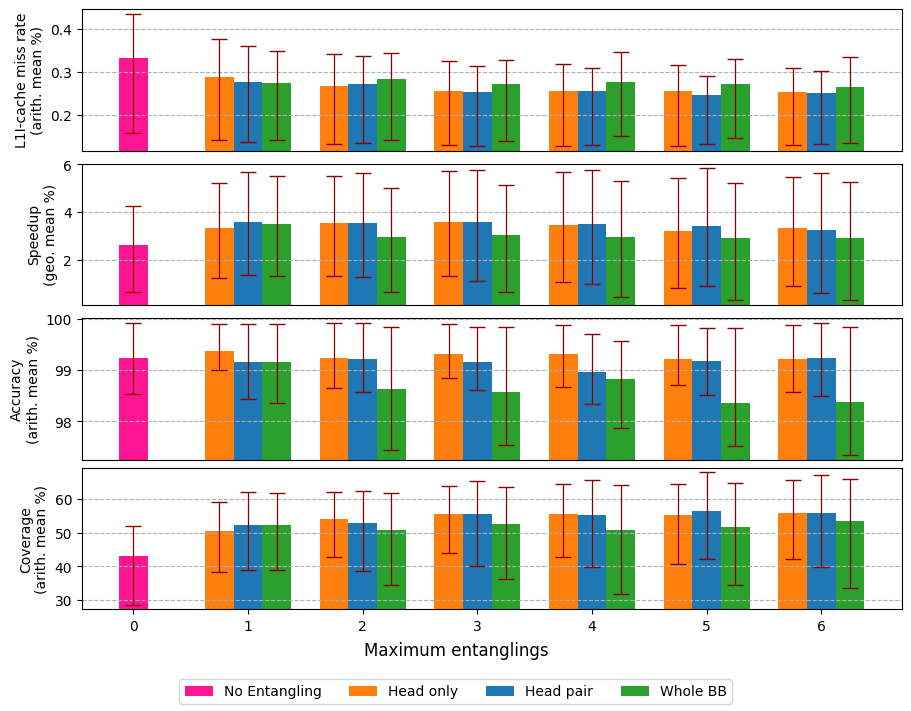

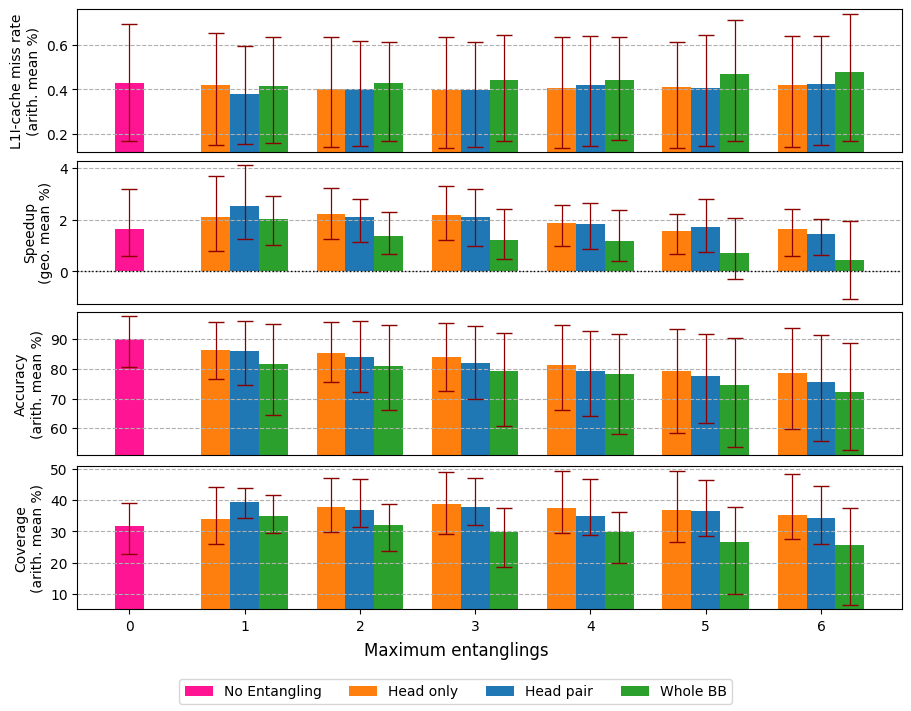

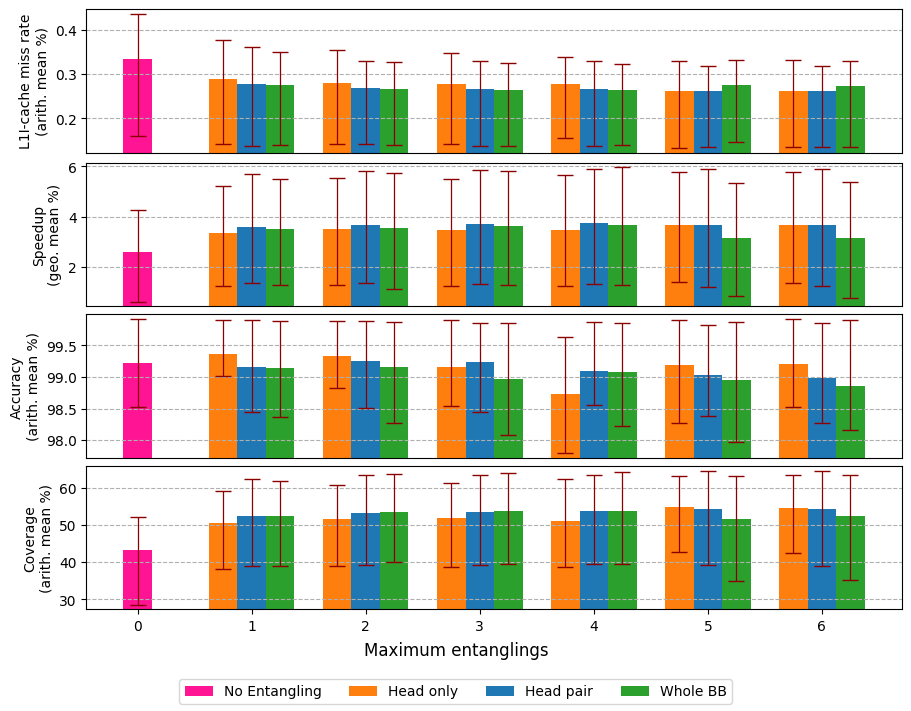

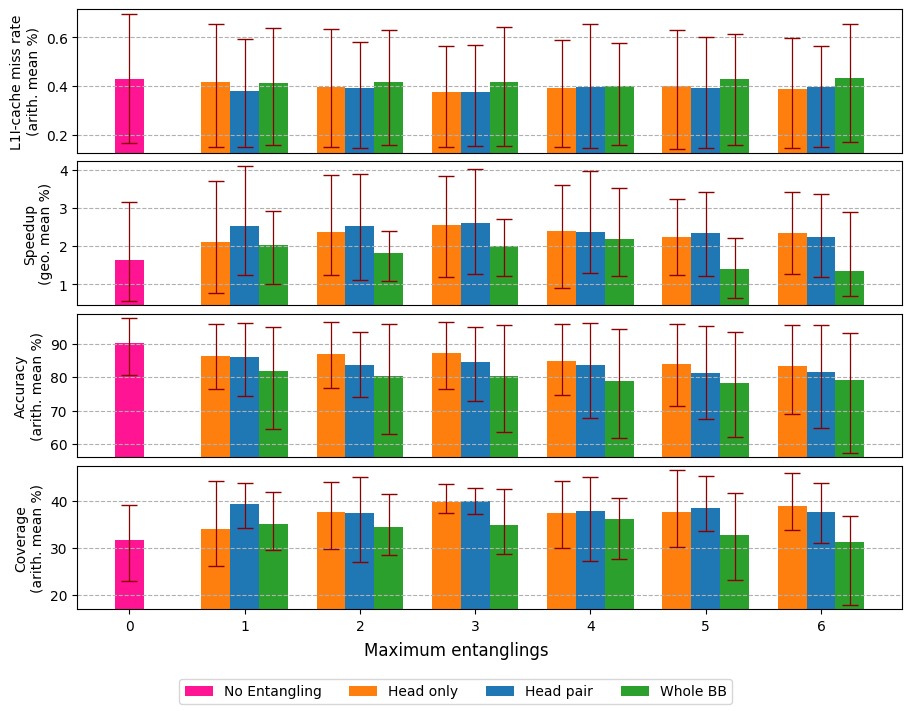

In [41]:
def maxEntanglingsBars(
    ncols=1,
    nrows=4,
    metrics=[("frac_miss", "arith"), ("speedup", "geo"), ("accuracy", "arith"), ("coverage", "arith")],
    smallICache=False,
    compressed=False,
    run="Ext",
    figsize=(9,7)
):
    fig, axss = plt.subplots(nrows=nrows, ncols=ncols, layout='constrained', figsize=figsize)
    axs = axss if ncols == 1 or nrows == 1 else [ax for axs in axss for ax in axs]

    labelling = True
    for ax, (metric, avg) in zip(axs, metrics):
        ydata = []
        config0 = f"EntanglingIPrefetcherNoEntangling{'SmallICache' if smallICache else ''}Config"
        av = PERCENT_LAMBDA.get(metric, lambda y: y*100)(RESULTS[run][config0][avg][metric])
        mx = PERCENT_LAMBDA.get(metric, lambda y: y*100)(RESULTS[run][config0]["max"][metric])
        mn = PERCENT_LAMBDA.get(metric, lambda y: y*100)(RESULTS[run][config0]["min"][metric])
        ax.bar(
            x=0, 
            height=av,
            width=0.25,
            label="No Entangling" if labelling else None,
            color="deeppink",
        )
        ax.errorbar(
            x=0,
            y=[av],
            yerr=[[av-mn], [mx-av]],
            fmt="o",
            color="darkred",
            markersize=0,
            capsize=6,
            elinewidth=0.9,
        )
        ydata.extend([mx, mn])        
        for i, (variant, label, color) in enumerate([("OnlyHead", "Head only", "C1"), ("OnlyHeadTwo", "Head pair", "C0"), ("", "Whole BB", "C2")]):
            configs=[
                f"EntanglingIPrefetcherMaxEntanglings{maxEntanglings}{'Compressed' if compressed else 'Uncompressed'}{variant}{'SmallICache' if smallICache else ''}Config"
                for maxEntanglings in range(1,7)
            ]
            avs = [PERCENT_LAMBDA.get(metric, lambda y: y*100)(RESULTS[run][config][avg][metric]) for config in configs]
            mxs = [PERCENT_LAMBDA.get(metric, lambda y: y*100)(RESULTS[run][config]["max"][metric]) for config in configs]
            mns = [PERCENT_LAMBDA.get(metric, lambda y: y*100)(RESULTS[run][config]["min"][metric]) for config in configs]
            ax.bar(
                x=np.arange(6) + 0.75 + i*0.25, 
                height=avs,
                width=0.25,
                label=label if labelling else None,
                color=color,
            )
            ax.errorbar(
                x=np.arange(6) + 0.75 + i*0.25,
                y=avs,
                yerr=[
                    [av - mn for (av, mn) in zip(avs, mns)],
                    [mx - av for (av, mx) in zip(avs, mxs)],
                ],
                fmt="o",
                color="darkred",
                markersize=0,
                capsize=6,
                elinewidth=0.9,
            )
            ydata.extend([*mxs, *mns])
        r = max(ydata) - min(ydata)
        ax.set_ylim(bottom=max(-1000 if metric=="speedup" else 0, min(ydata)-r/30), top=max(ydata)+r/30)
        ax.set_ylabel(f"{METRIC_NAMES.get(metric, metric.capitalize())}\n({BENCHMARK_NAMES[avg].lower()} %)")
        ax.yaxis.grid(linestyle="--")
        ax.axhline(y=0,linewidth=1, color='black', linestyle=":")
        labelling = False

    for ax in axs[:-1]:
        ax.set_xticklabels([])
        ax.tick_params("x", length=0)

    #fig.suptitle("Prefetcher accuracy, coverage, miss rate and speedup as maximum entanglings limit varies\n")
    fig.supxlabel("Maximum entanglings\n\n")
    fig.legend(loc="lower center", ncol=4)

    return fig, axs

maxEntanglingsBars()[0].savefig('graphs/maxEntanglingBars.png', dpi=FIG_DPI_BIG)
maxEntanglingsBars(smallICache=True)[0].savefig('graphs/maxEntanglingBarsSmallICache.png', dpi=FIG_DPI_BIG)
maxEntanglingsBars(compressed=True)[0].savefig('graphs/maxEntanglingBarsCompressed.png', dpi=FIG_DPI_BIG)
maxEntanglingsBars(compressed=True, smallICache=True)[0].savefig('graphs/maxEntanglingBarsCompressedSmallICache.png', dpi=FIG_DPI_BIG)



In [42]:
def plot_trend(
    metric: str,
    run: str,
    configs: List[Tuple[int, str, str]],
    benchmarks=BENCHMARKS,
    figsize=None,
    ymin=None,
    ymax=None,
    figax = None,
    zero_tick=False,
    label=False,
    xticks=True,
    yticks=True,
    title=False,
):
    fig, ax = figax if figax is not None else plt.subplots()
    if figsize is not None:
        fig.set_size_inches(figsize)
    ax.set_xticks(([0] if zero_tick else [])+[x[0] for x in configs], ([0] if zero_tick else [])+[x[1] for x in configs])
    if not xticks:
        ax.set_xticklabels([])
        ax.tick_params("x", length=0)
    if not yticks:
        ax.set_yticklabels([])
        ax.tick_params("y", length=0)

    baseline=None
    if configs[0][2] == "EntanglingIPrefetcherNoPrefetcherBaselineConfig":
        configs = configs.copy()
        baseline = configs.pop(0)

    for benchmark in benchmarks:
        xvalues, yvalues = zip(*[(x, PERCENT_LAMBDA.get(metric, lambda y: y*100)(RESULTS[run][config][benchmark][metric])) for (x, _, config) in configs])

        ax.plot(
            xvalues, 
            yvalues,
            color=BENCHMARK_COLORS[benchmark],
            marker=BENCHMARK_MARKERS[benchmark],
            label=(BENCHMARK_NAMES[benchmark] if label else None),
            linestyle=BENCHMARK_LINESTYLES[benchmark],
            alpha=BENCHMARK_ALPHAS[benchmark] / (1 if not figax else 2),            
        )
        if baseline:
            ax.plot(
                [baseline[0], configs[0][0]], 
                [PERCENT_LAMBDA.get(metric, lambda y: y*100)(RESULTS[run][baseline[2]][benchmark][metric]), yvalues[0]], 
                color=BENCHMARK_COLORS[benchmark],
                marker=BENCHMARK_MARKERS[benchmark],
                linestyle=BENCHMARK_BASELINE_LINESTYLES[benchmark],
                alpha=BENCHMARK_ALPHAS[benchmark],
            )

    ax.set_ylim(bottom=ymin, top=ymax)
    if zero_tick:
        ax.set_xlim(left=0)

    if figax is None:
        fig.legend()

    ax.grid(linestyle='--')

    if title:
        ax.set_title(f"{add_newlines(METRIC_NAMES.get(metric, metric.capitalize()), 4)} (%)", pad=10, weight="bold")

    return fig, ax

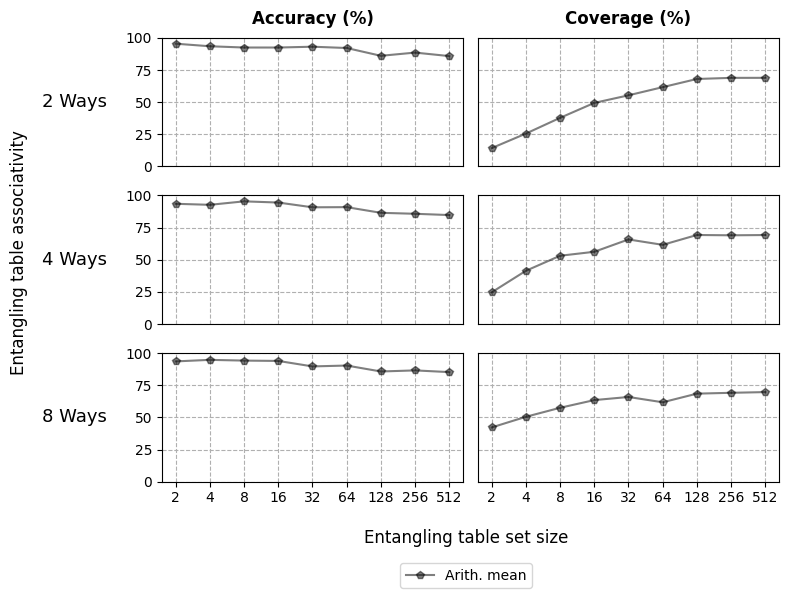

In [50]:
fig, axss = plt.subplots(nrows=3, ncols=2, layout="tight", figsize=(8,6))

plot_trend("accuracy", "Final", TREND_TABLE_SIZE_2_WAYS, benchmarks=["arith"], figax=(fig, axss[0,0]), ymin=0, ymax=100, label=True, xticks=False)
plot_trend("accuracy", "Final", TREND_TABLE_SIZE_4_WAYS, benchmarks=["arith"], figax=(fig, axss[1,0]), ymin=0, ymax=100, xticks=False)
plot_trend("accuracy", "Final", TREND_TABLE_SIZE_8_WAYS, benchmarks=["arith"], figax=(fig, axss[2,0]), ymin=0, ymax=100)

plot_trend("coverage", "Final", TREND_TABLE_SIZE_2_WAYS, benchmarks=["arith"], figax=(fig, axss[0,1]), ymin=0, ymax=100, xticks=False, yticks=False)
plot_trend("coverage", "Final", TREND_TABLE_SIZE_4_WAYS, benchmarks=["arith"], figax=(fig, axss[1,1]), ymin=0, ymax=100, xticks=False, yticks=False)
plot_trend("coverage", "Final", TREND_TABLE_SIZE_8_WAYS, benchmarks=["arith"], figax=(fig, axss[2,1]), ymin=0, ymax=100, yticks=False)

axss[0,0].set_title("Accuracy (%)", pad=10, weight="bold")
axss[0,1].set_title("Coverage (%)", pad=10, weight="bold")
axss[0,0].annotate("2 Ways", (-0.4, 0.5), xycoords="axes fraction", va="center", fontsize = 13)
axss[1,0].annotate("4 Ways", (-0.4, 0.5), xycoords="axes fraction", va="center", fontsize = 13)
axss[2,0].annotate("8 Ways", (-0.4, 0.5), xycoords="axes fraction", va="center", fontsize = 13)
fig.supxlabel("Entangling table set size\n\n", x=0.59)
fig.supylabel("Entangling table associativity", y=0.57)
fig.legend(loc="lower center", ncol=4, bbox_to_anchor=(0.59,0))
fig.savefig('graphs/TableSizeAccuracyCoverage.png', dpi=FIG_DPI)


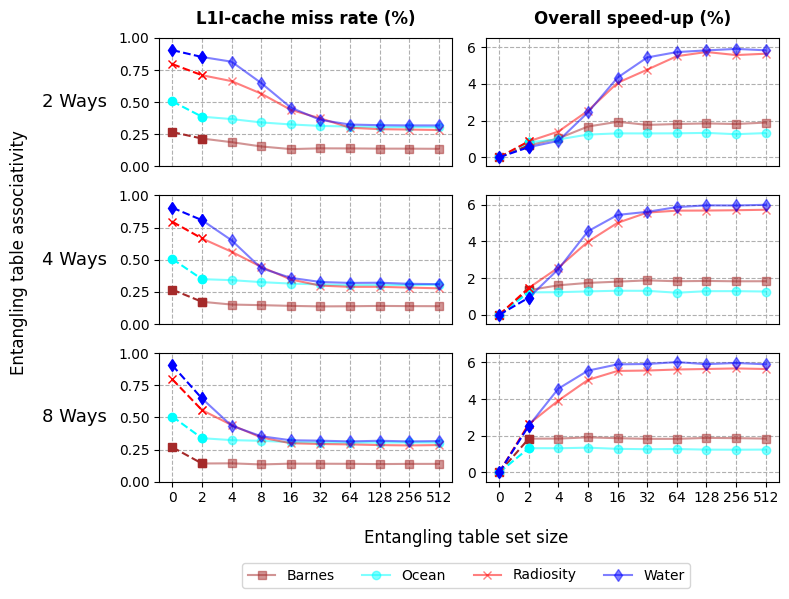

In [ ]:
fig, axss = plt.subplots(nrows=3, ncols=2, layout="tight", figsize=(8,6))

plot_trend("frac_miss", "Ext", TREND_NO_PREFETCHER_BASELINE+TREND_TABLE_SIZE_2_WAYS, figax=(fig, axss[0,0]), ymin=0, ymax=1, label=True, xticks=False)
plot_trend("frac_miss", "Ext", TREND_NO_PREFETCHER_BASELINE+TREND_TABLE_SIZE_4_WAYS, figax=(fig, axss[1,0]), ymin=0, ymax=1, xticks=False)
plot_trend("frac_miss", "Ext", TREND_NO_PREFETCHER_BASELINE+TREND_TABLE_SIZE_8_WAYS, figax=(fig, axss[2,0]), ymin=0, ymax=1)

plot_trend("speedup", "Ext", TREND_NO_PREFETCHER_BASELINE+TREND_TABLE_SIZE_2_WAYS, figax=(fig, axss[0,1]), ymin=-0.5, ymax=6.5, xticks=False)
plot_trend("speedup", "Ext", TREND_NO_PREFETCHER_BASELINE+TREND_TABLE_SIZE_4_WAYS, figax=(fig, axss[1,1]), ymin=-0.5, ymax=6.5, xticks=False)
plot_trend("speedup", "Ext", TREND_NO_PREFETCHER_BASELINE+TREND_TABLE_SIZE_8_WAYS, figax=(fig, axss[2,1]), ymin=-0.5, ymax=6.5)

axss[0,0].set_title("L1I-cache miss rate (%)", pad=10, weight="bold")
axss[0,1].set_title("Overall speed-up (%)", pad=10, weight="bold")
axss[0,0].annotate("2 Ways", (-0.4, 0.5), xycoords="axes fraction", va="center", fontsize = 13)
axss[1,0].annotate("4 Ways", (-0.4, 0.5), xycoords="axes fraction", va="center", fontsize = 13)
axss[2,0].annotate("8 Ways", (-0.4, 0.5), xycoords="axes fraction", va="center", fontsize = 13)
fig.supxlabel("Entangling table set size\n\n", x=0.59)
fig.supylabel("Entangling table associativity", y=0.57)
fig.legend(loc="lower center", ncol=4, bbox_to_anchor=(0.59,0))
fig.savefig('graphs/TableSizeMissSpeedup.png', dpi=FIG_DPI)

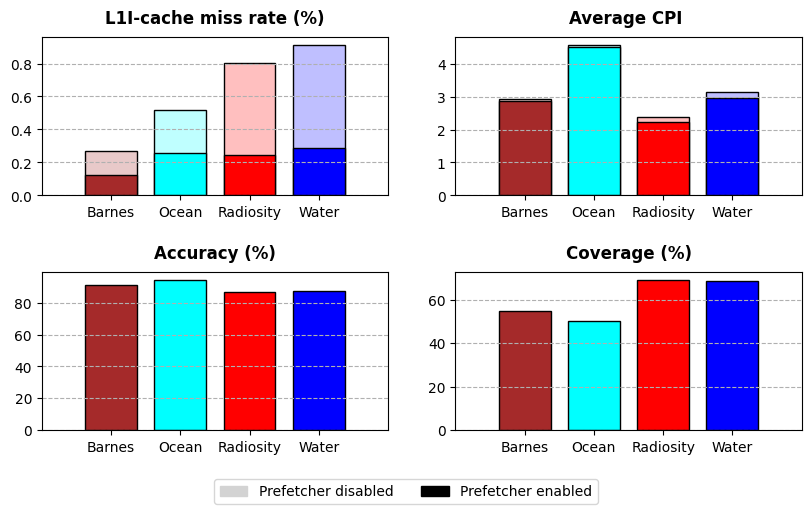

In [ ]:
fig, axss = plt.subplots(ncols=2, nrows=2, layout='constrained', figsize=(8,5))
axs = [ax for axs in axss for ax in axs]

labelling = True
for ax, metric in zip(axs, ["frac_miss", "cpi", "accuracy", "coverage"]):
    pref_ys = [PERCENT_LAMBDA.get(metric, lambda y: y*100)(RESULTS["Final"][PREF_CONFIG][benchmark][metric]) for benchmark in BENCHMARKS]
    base_ys = [PERCENT_LAMBDA.get(metric, lambda y: y*100)(RESULTS["Final"][BASE_CONFIG][benchmark][metric]) for benchmark in BENCHMARKS]
    ax.bar(
        x=np.arange(4),
        height=base_ys,
        width=0.75,
        color=[(*BENCHMARK_COLORS_RGB[benchmark], 0.25) for benchmark in BENCHMARKS],
        edgecolor="black",
    )
    ax.bar(
        x=np.arange(4),
        height=pref_ys,
        width=0.75,
        label=[BENCHMARK_NAMES[benchmark] for benchmark in BENCHMARKS] if labelling else None,
        color=[BENCHMARK_COLORS[benchmark] for benchmark in BENCHMARKS],
        edgecolor="black",
    )
    ax.set_ylim(bottom=0)
    ax.set_title(f"{METRIC_NAMES.get(metric, metric.capitalize())} {'(%)' if metric != 'cpi' else ''}", pad=10, weight="bold")
    ax.set_xlim(-1,4)
    ax.set_xticks(np.arange(4), [BENCHMARK_NAMES[benchmark] for benchmark in BENCHMARKS])
    ax.yaxis.grid(linestyle="--")
    labelling = False

#fig.suptitle("Prefetcher accuracy, coverage, miss rate and speedup as maximum entanglings limit varies\n")
dark_patch = mpatches.Patch(color='black', label='Prefetcher enabled')
light_patch = mpatches.Patch(color='lightgrey', label='Prefetcher disabled')
fig.supxlabel("\n")
fig.legend(handles=[light_patch, dark_patch], loc="lower center", ncol=4)
fig.set_constrained_layout_pads(wspace=0.1, hspace=0.1)
fig.savefig("graphs/PreliminaryMany.png", dpi=FIG_DPI)


In [ ]:
def add_newlines(s, n):
    split = s.split(" ")
    for i in range(n-1, len(split), n):
        split[i] += "\n"
    return " ".join(split)

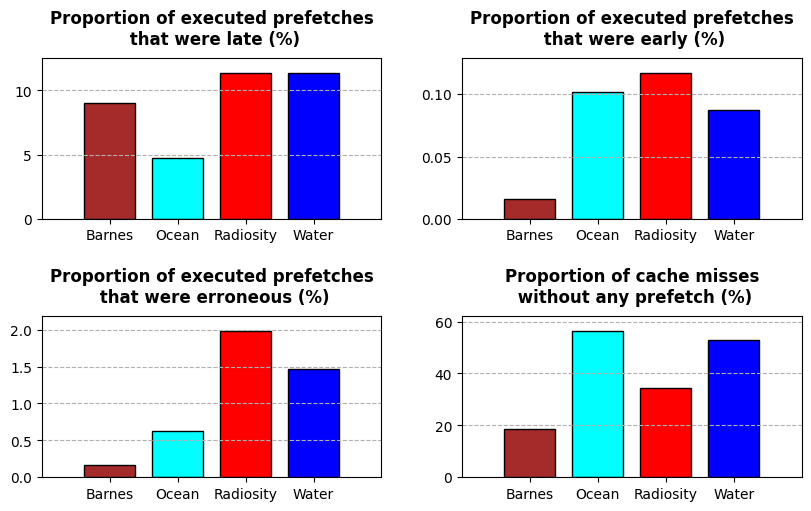

In [ ]:
fig, axss = plt.subplots(ncols=2, nrows=2, layout='constrained', figsize=(8,5))
axs = [ax for axs in axss for ax in axs]

labelling = True
for ax, metric in zip(axs, ["frac_late_prefetch", "frac_early_prefetch", "frac_erroneous_prefetch", "frac_no_prefetch"]):
    pref_ys = [PERCENT_LAMBDA.get(metric, lambda y: y*100)(RESULTS["Final"][PREF_CONFIG][benchmark][metric]) for benchmark in BENCHMARKS]
    ax.bar(
        x=np.arange(4),
        height=pref_ys,
        width=0.75,
        label=[BENCHMARK_NAMES[benchmark] for benchmark in BENCHMARKS] if labelling else None,
        color=[BENCHMARK_COLORS[benchmark] for benchmark in BENCHMARKS],
        edgecolor="black",
    )
    ax.set_ylim(bottom=0, top=max(pref_ys)*1.1)
    ax.set_title(f"{add_newlines(METRIC_NAMES.get(metric, metric.capitalize()), 4)} (%)", pad=10, weight="bold")
    ax.set_xlim(-1,4)
    ax.set_xticks(np.arange(4), [BENCHMARK_NAMES[benchmark] for benchmark in BENCHMARKS])
    ax.yaxis.grid(linestyle="--")
    labelling = False

fig.set_constrained_layout_pads(wspace=0.1, hspace=0.1)
fig.savefig("graphs/PreliminaryTimeliness.png", dpi=FIG_DPI)


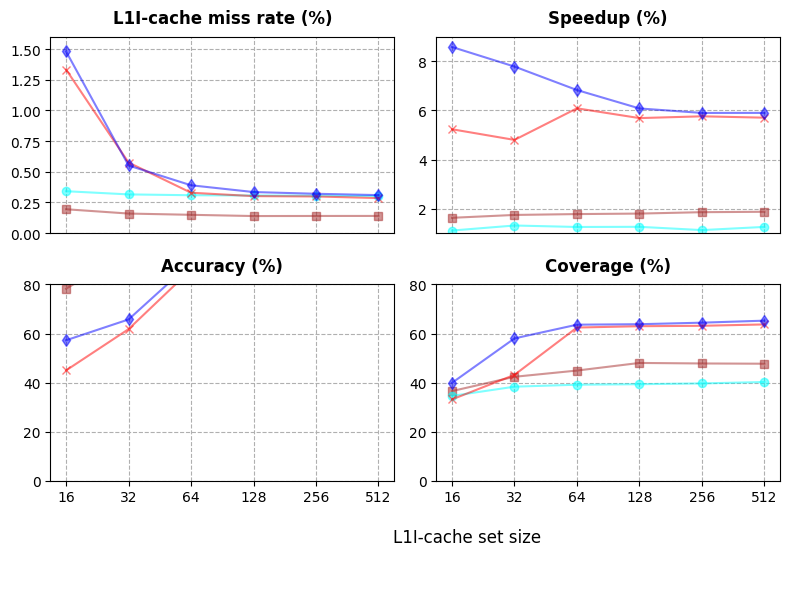

In [ ]:
fig, axss = plt.subplots(nrows=2, ncols=2, layout="tight", figsize=(8,6))

#plot_trend("frac_miss", "Ext", TREND_CACHE_SIZE_2_WAYS_NO_PREFETCHER, figax=(fig, axss[0,0]), ymin=0, ymax=3, xticks=False, title=True)
plot_trend("frac_miss", "Ext", TREND_CACHE_SIZE_2_WAYS_WITH_PREFETCHER, figax=(fig, axss[0,0]), ymin=0, ymax=1.6, xticks=False, title=True)

plot_trend("speedup", "Ext", TREND_CACHE_SIZE_2_WAYS_WITH_PREFETCHER, figax=(fig, axss[0,1]), ymin=1, ymax=9, xticks=False, title=True)

plot_trend("accuracy", "Ext", TREND_CACHE_SIZE_2_WAYS_WITH_PREFETCHER, figax=(fig, axss[1,0]), ymin=0, ymax=80, title=True)

plot_trend("coverage", "Ext", TREND_CACHE_SIZE_2_WAYS_WITH_PREFETCHER, figax=(fig, axss[1,1]), ymin=0, ymax=80, title=True)

fig.supxlabel("L1I-cache set size\n\n", x=0.59)
#fig.legend(loc="lower center", ncol=4, bbox_to_anchor=(0.59,0))
fig.savefig('graphs/L1ICacheSize.png', dpi=FIG_DPI)

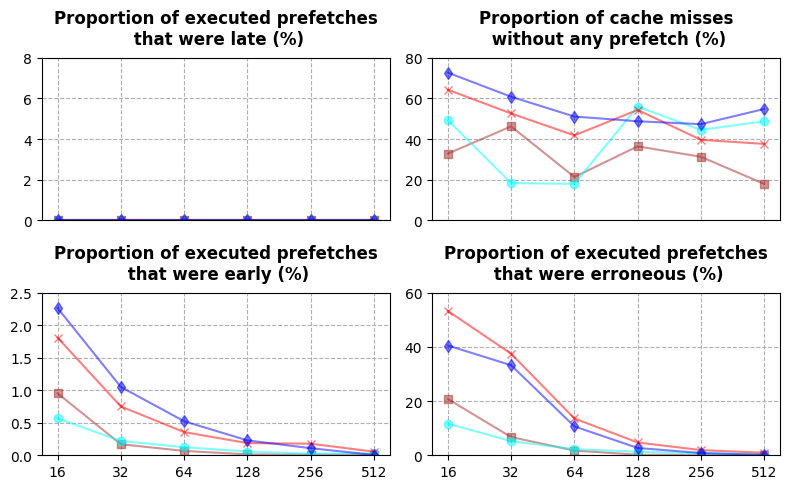

In [ ]:
fig, axss = plt.subplots(nrows=2, ncols=2, layout="tight", figsize=(8,5))

plot_trend("frac_late_prefetch", "Ext", TREND_CACHE_SIZE_2_WAYS_WITH_PREFETCHER, figax=(fig, axss[0,0]), ymin=0, ymax=8, xticks=False, title=True)

plot_trend("frac_no_prefetch", "Ext", TREND_CACHE_SIZE_2_WAYS_WITH_PREFETCHER, figax=(fig, axss[0,1]), ymin=0, ymax=80, xticks=False, title=True)

plot_trend("frac_early_prefetch", "Ext", TREND_CACHE_SIZE_2_WAYS_WITH_PREFETCHER, figax=(fig, axss[1,0]), ymin=0, ymax=2.5, title=True)

plot_trend("frac_erroneous_prefetch", "Ext", TREND_CACHE_SIZE_2_WAYS_WITH_PREFETCHER, figax=(fig, axss[1,1]), ymin=0, ymax=60, title=True)

fig.savefig('graphs/L1ICacheSizeTimeliness.png', dpi=FIG_DPI)

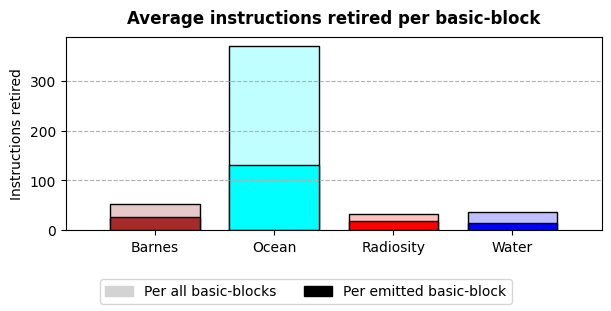

In [ ]:
fig, ax = plt.subplots(layout='constrained', figsize=(6,3))

new_ys = [RESULTS["Final"][PREF_CONFIG][benchmark]["inst_per_new_bb"] for benchmark in BENCHMARKS]
emit_ys = [RESULTS["Final"][PREF_CONFIG][benchmark]["inst_per_emit_bb"] for benchmark in BENCHMARKS]
ax.bar(
    x=np.arange(4),
    height=emit_ys,
    width=0.75,
    color=[(*BENCHMARK_COLORS_RGB[benchmark], 0.25) for benchmark in BENCHMARKS],
    edgecolor="black",
)
ax.bar(
    x=np.arange(4),
    height=new_ys,
    width=0.75,
    label=[BENCHMARK_NAMES[benchmark] for benchmark in BENCHMARKS] if labelling else None,
    color=[BENCHMARK_COLORS[benchmark] for benchmark in BENCHMARKS],
    edgecolor="black",
)

ax.set_xlim(-0.75,3.75)
ax.set_xticks(np.arange(4), [BENCHMARK_NAMES[benchmark] for benchmark in BENCHMARKS])
ax.set_ylabel("Instructions retired")
ax.set_title("Average instructions retired per basic-block", pad=10, weight="bold")
ax.yaxis.grid(linestyle="--")
fig.savefig("graphs/InstPerBB.png")

dark_patch = mpatches.Patch(color='black', label='Per emitted basic-block')
light_patch = mpatches.Patch(color='lightgrey', label='Per all basic-blocks')
fig.supxlabel("\n")
fig.legend(handles=[light_patch, dark_patch], loc="lower center", ncol=4)


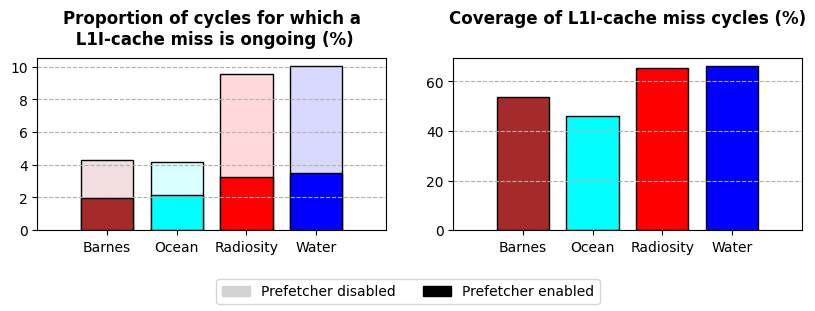

In [ ]:
fig, [ax, ax2] = plt.subplots(ncols=2, nrows=1, layout='constrained', figsize=(8,3))

pref_ys = [PERCENT_LAMBDA.get(metric, lambda y: y*100)(RESULTS["Final"][PREF_CONFIG][benchmark]["frac_demand_miss_cycles"]) for benchmark in BENCHMARKS]
base_ys = [PERCENT_LAMBDA.get(metric, lambda y: y*100)(RESULTS["Final"][BASE_CONFIG][benchmark]["frac_demand_miss_cycles"]) for benchmark in BENCHMARKS]
ax.bar(
    x=np.arange(4),
    height=base_ys,
    width=0.75,
    color=[(*BENCHMARK_COLORS_RGB[benchmark], 0.15) for benchmark in BENCHMARKS],
    edgecolor="black",
)
ax.bar(
    x=np.arange(4),
    height=pref_ys,
    width=0.75,
    label=[BENCHMARK_NAMES[benchmark] for benchmark in BENCHMARKS] if labelling else None,
    color=[BENCHMARK_COLORS[benchmark] for benchmark in BENCHMARKS],
    edgecolor="black",
)
ax.set_xlim(-1,4)
ax.set_xticks(np.arange(4), [BENCHMARK_NAMES[benchmark] for benchmark in BENCHMARKS])
ax.yaxis.grid(linestyle="--")

pref_ys = [PERCENT_LAMBDA.get(metric, lambda y: y*100)(RESULTS["Ext"][PREF_CONFIG][benchmark]["demand_miss_cycles_coverage"]) for benchmark in BENCHMARKS]
ax2.bar(
    x=np.arange(4),
    height=pref_ys,
    width=0.75,
    label=[BENCHMARK_NAMES[benchmark] for benchmark in BENCHMARKS] if labelling else None,
    color=[BENCHMARK_COLORS[benchmark] for benchmark in BENCHMARKS],
    edgecolor="black",
)
ax2.set_xlim(-1,4)
ax2.set_xticks(np.arange(4), [BENCHMARK_NAMES[benchmark] for benchmark in BENCHMARKS])
ax2.yaxis.grid(linestyle="--")

ax.set_title(add_newlines("Proportion of cycles for which a L1I-cache miss is ongoing (%)", 6), weight="bold", pad=10)
ax2.set_title(add_newlines("Coverage of L1I-cache miss cycles (%)", 6), weight="bold", pad=10)
dark_patch = mpatches.Patch(color='black', label='Prefetcher enabled')
light_patch = mpatches.Patch(color='lightgrey', label='Prefetcher disabled')
fig.supxlabel("\n")
fig.legend(handles=[light_patch, dark_patch], loc="lower center", ncol=4)
fig.set_constrained_layout_pads(wspace=0.1, hspace=0.1)
fig.savefig("graphs/FracDemandMissCycles.png", dpi=FIG_DPI)


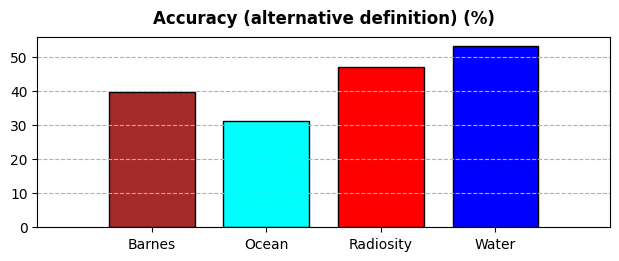

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, layout='constrained', figsize=(8,2.5))

pref_ys = [PERCENT_LAMBDA.get(metric, lambda y: y*100)(RESULTS["Final"][PREF_CONFIG][benchmark]["accuracy_other"]) for benchmark in BENCHMARKS]
ax.bar(
    x=np.arange(4),
    height=pref_ys,
    width=0.75,
    label=[BENCHMARK_NAMES[benchmark] for benchmark in BENCHMARKS] if labelling else None,
    color=[BENCHMARK_COLORS[benchmark] for benchmark in BENCHMARKS],
    edgecolor="black",
)
ax.set_xlim(-1,4)
ax.set_xticks(np.arange(4), [BENCHMARK_NAMES[benchmark] for benchmark in BENCHMARKS])
ax.yaxis.grid(linestyle="--")

ax.set_title(add_newlines("Accuracy (alternative definition) (%)", 6), weight="bold", pad=10)
fig.set_constrained_layout_pads(w_pad=1)
fig.savefig("graphs/AlternativeAccuracy.png", dpi=FIG_DPI)
